In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px
df = pd.read_csv('C:/Users/Hi/Downloads/archive (8)/tested.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
missing_values = df.isnull()

missing_counts = df.isnull().sum()

print("Counts of missing values:")
print(missing_counts)

Counts of missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


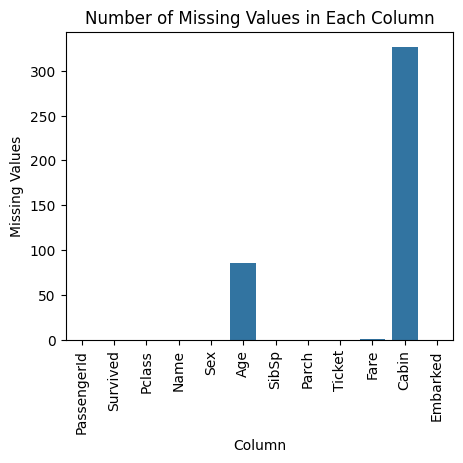

In [57]:
missing_values = df.isnull().sum()

missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']

plt.figure(figsize=(5, 4))
sns.barplot(x='Column', y='Missing Values', data=missing_values_df)
plt.xticks(rotation=90) 
plt.title('Number of Missing Values in Each Column')
plt.show()

In [58]:
df['Age'].fillna(df['Age'].median())

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [59]:
most_frequent_cabin = df['Cabin'].mode()[0]
df['Cabin'].fillna(most_frequent_cabin, inplace=True)

print(df.isnull().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64


In [60]:

rel_dur_rat = px.bar(df, x = 'Pclass', y = 'Survived', color = "Pclass")
rel_dur_rat.update_layout(title='classes vs survival ratio',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis=dict(showgrid=False), 
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()

In [73]:
rel_dur_rat = px.histogram(df, x = 'Survived', y = 'Sex', color = "Survived")
rel_dur_rat.update_layout(title='gender vs survival ratio',
                          title_x=0.5,
                          title_pad=dict(t=20),
                          title_font=dict(size=20),
                          xaxis=dict(showgrid=False), 
                          yaxis=dict(showgrid=False),
                          plot_bgcolor = 'white')
rel_dur_rat.show()